____
# Home Credit Default Risk - EDA
____


EDA of [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk) Competition from Kaggle.

## <a id='index'>Index</a>
___
**<a href= '#section1'>Section 1: application_{train|test}.csv</a>**
   - <a href ='#1.1'>1.1: Missing Values</a>
   - <a href ='#1.2'>1.2: Target</a>
   - <a href ='#1.3'>1.3: Data Type of Columns</a>
   - <a href ='#1.4'>1.4: Correlation with Target</a>
   - <a href ='#1.5'>1.5: DAYS_BIRTH</a>
   - <a href ='#1.6'>1.6: REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY</a>
   - <a href ='#1.7'>1.7: DAYS_LAST_PHONE_CHANGE and DAYS_ID_PUBLISH</a>
   - <a href ='#1.8'>1.8: FLAG_DOCUMENTS_*n*</a>
   - <a href ='#1.9'>1.9: EXT_SOURCE_*n*</a>
   - <a href ='#1.10'>1.10: DAYS_EMPLOYED</a>    
   - <a href ='#1.11'>1.11: Normalized Information About Where Client Lives</a>
   
**<a href= '#section2'>Section 2: previous_application.csv</a>**
   - <a href ='#2.1'>2.1: Data Types of Columns</a>
   - <a href ='#2.2'>2.2: Missing Values</a>
   - <a href ='#2.3'>2.3: RATE_INTEREST_PRIMARY and RATE_INTEREST_PREIVILEGED</a>
   - <a href ='#2.4'>2.4: DAYS_FIRST_DRAWING</a>
   - <a href ='#2.5'>2.5: DAYS_TERMINATION</a>
   - <a href ='#2.6'>2.6: Number 354243</a>
**<a href= '#section3'>Section 3: bureau.csv</a>**
   - <a href ='#3.1'>3.1: Data Types of Columns</a>
   - <a href ='#3.2'>3.2: Missing Values</a>
   - <a href ='#3.3'>3.3: Number of Previous Applications per User</a>
   - <a href ='#3.4'>3.4: CREDIT_ACTIVE</a>
   - <a href ='#3.5'>3.5: DAYS_TERMINATION</a>
   - <a href ='#3.6'>3.6: Number 354243</a>
   
**<a href= '#section4'>Section 4: Limitations</a>**

**<a href= '#section5'>Section 5: Feature Importance using Random Forest</a>**
   - <a href ='#2.1'>2.1: Data Types of Columns</a>
   - <a href ='#2.2'>2.2: Missing Values</a>
   - <a href ='#2.3'>2.3: RATE_INTEREST_PRIMARY and RATE_INTEREST_PREIVILEGED</a>
   - <a href ='#2.4'>2.4: DAYS_FIRST_DRAWING</a>
   - <a href ='#2.5'>2.5: DAYS_TERMINATION</a>
   - <a href ='#2.6'>2.6: Number 354243</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

There are 8 datasets in this challenges. Below is relational database schema.

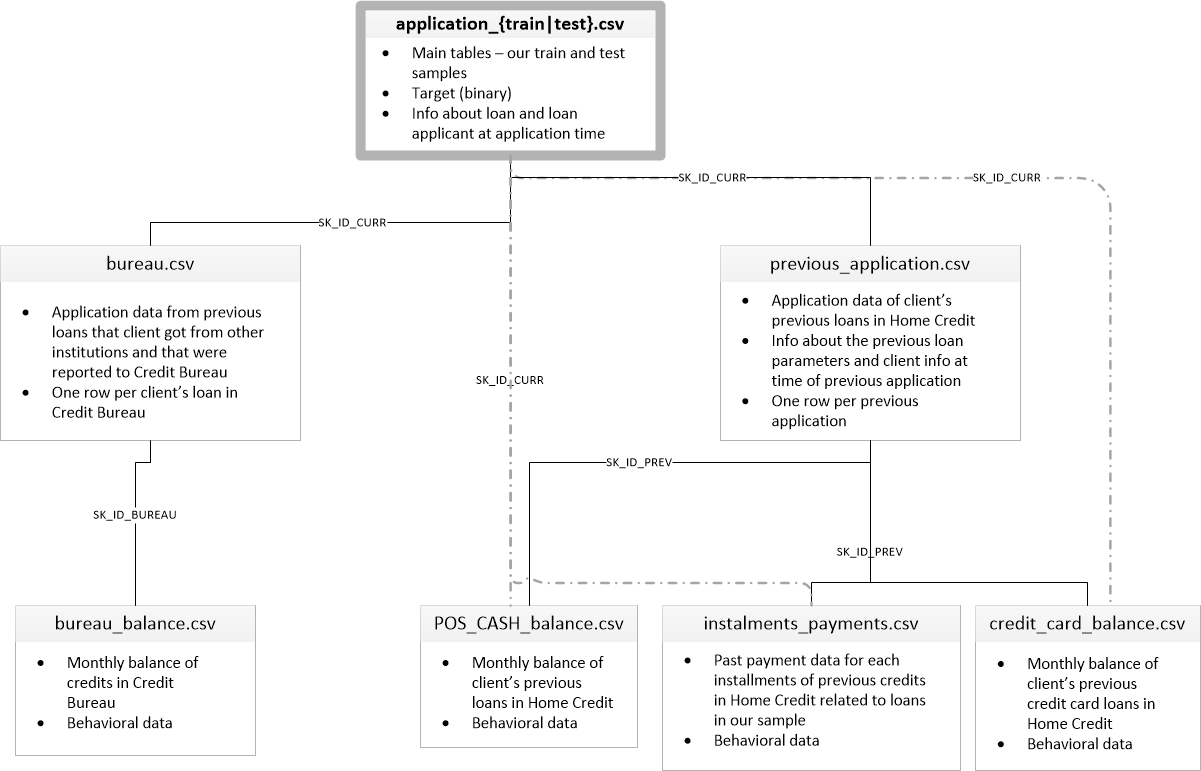

## <a id = 'section1' href='#index'>Section 1: application_(train|test).csv</a>
___

* Main tables - our train and test samples
* Targe (binary)
* Info about loan and loan pplicant at application time

In [2]:
# load data
app_train = pd.read_csv('../input/Home Credit Default Risk/application_train.csv').sort_values('SK_ID_CURR').reset_index(drop = True)
app_test = pd.read_csv('../input/Home Credit Default Risk/application_test.csv').sort_values('SK_ID_CURR').reset_index(drop = True)

In [3]:
print("Size of train dataset is: ", app_train.shape)
print("Size of test dataset is: ", app_test.shape)

Size of train dataset is:  (307511, 122)
Size of test dataset is:  (48744, 121)


In [4]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### <a href='#index' id = '1.1'>1.1 Missing Values</a>

In [5]:
from utils import missing_values_table

missing_values_table = missing_values_table(app_train)
missing_values_table.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


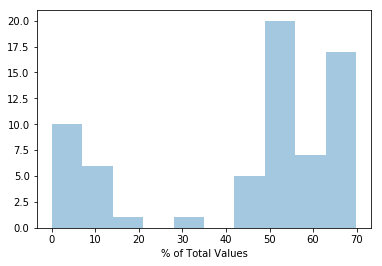

In [6]:
sns.distplot(missing_values_table['% of Total Values'], kde = False, bins = 10)

There are columns with lots of missing values. We will explore options as we go:
- impute the missing values
- drop columns with missing values (67 out of 121 cols)
- drop columns with majority missing (~>50%) and impute the missing values

Overall, we will have to **explore what missing values mean.**

### <a href='#index' id='1.2'>1.2 Target</a>

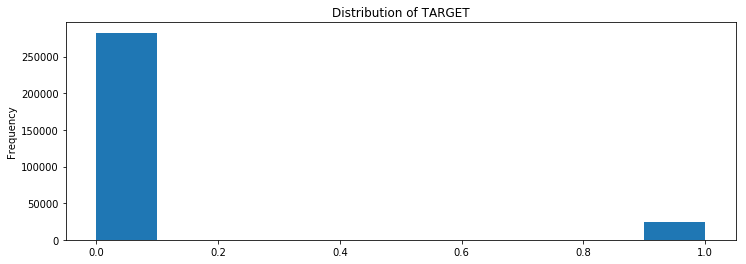

In [7]:
plt.figure(figsize=(12,4))
plt.title("Distribution of TARGET")
app_train['TARGET'].plot.hist()

**Imbalance class problem** needs to be addressed.

### <a id='1.3' href='#index'>1.3 Data Types of Columns</a>

In [8]:
# number of each type of columns
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
# number of unique classes for each object type columns
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

We will perform **One Hot Encoding** when data cleaning.

### <a id='1.4' href='#index'>1.4 Correlation with Target</a>

In [10]:
# Correlation with the Target. Absolute Values. 
corr = app_train.corr()
print("Most postivie correlations:\n\n", corr['TARGET'].sort_values(ascending=False).head(10))
print("\nMost Negative correlations:\n\n", corr['TARGET'].sort_values(ascending=True).head(10))

Most postivie correlations:

 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

Most Negative correlations:

 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


Correlation doesn't necessarily mean a feature is more meaningful than others when determining the target, but it gives us a place to start looking.

### <a id='1.5' href='#index'>1.5 DAYS_BIRTH</a>

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


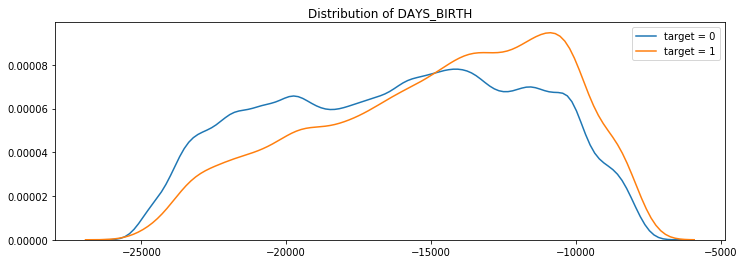

In [11]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_BIRTH")
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'], label='target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'], label='target = 1')

Notice DAYS_BIRTH is a **negative value**. Intuitively this is kind of confusing. But we don't necessarily have to change the data, because a data is just a data, all the same. 

According to column descriptions: *Client's age in days at the time of application* and it is *time only relative to the application*

On the other note:
- we can notice target = 1 (clients with payment difficulty) is skewed towards right -> meaning younger population has more difficulty paying back in time. 
- Older population on the other hand, is more likely to payback in time. 

### <a id='1.6' href='#index'>1.6 REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY</a>
According to column descriptions given:
* REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)


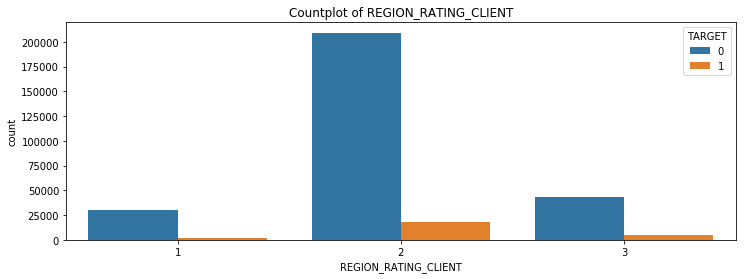

In [12]:
plt.figure(figsize=(12,4))
plt.title("Countplot of REGION_RATING_CLIENT")
sns.countplot(x='REGION_RATING_CLIENT', data=app_train, hue='TARGET')

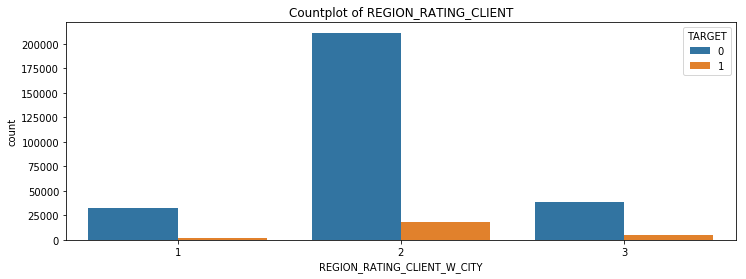

In [13]:
plt.figure(figsize=(12,4))
plt.title("Countplot of REGION_RATING_CLIENT")
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=app_train, hue='TARGET')

* REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY looks very similar. 

In [14]:
# Ratio b/w Target = 0 and 1 for each rating.
print('When REGION_RATING_CLIENT == 1',
       '\nNumber of observations is : \t',app_train[app_train['REGION_RATING_CLIENT']==1].shape[0],
      "\nAmong those TARGET == 1 is:\t", app_train[(app_train['REGION_RATING_CLIENT']==1) & (app_train['TARGET']==1)].shape[0],
     "\nThe percentage is:\t\t", format(app_train[(app_train['REGION_RATING_CLIENT']==1) & (app_train['TARGET']==1)].shape[0] / app_train[app_train['REGION_RATING_CLIENT']==1].shape[0] * 100, '.2f'), '%')
print('\nWhen REGION_RATING_CLIENT == 2',
       '\nNumber of observations is : \t',app_train[app_train['REGION_RATING_CLIENT']==2].shape[0],
      "\nAmong those TARGET == 1 is:\t", app_train[(app_train['REGION_RATING_CLIENT']==2) & (app_train['TARGET']==1)].shape[0],
     "\nThe percentage is:\t\t", format(app_train[(app_train['REGION_RATING_CLIENT']==2) & (app_train['TARGET']==1)].shape[0] / app_train[app_train['REGION_RATING_CLIENT']==2].shape[0] * 100, '.2f'), '%')
print('\nWhen REGION_RATING_CLIENT == 3',
       '\nNumber of observations is : \t',app_train[app_train['REGION_RATING_CLIENT']==3].shape[0],
      "\nAmong those TARGET == 1 is:\t", app_train[(app_train['REGION_RATING_CLIENT']==3) & (app_train['TARGET']==1)].shape[0],
     "\nThe percentage is:\t\t", format(app_train[(app_train['REGION_RATING_CLIENT']==3) & (app_train['TARGET']==1)].shape[0] / app_train[app_train['REGION_RATING_CLIENT']==3].shape[0] * 100, '.2f'), '%')

When REGION_RATING_CLIENT == 1 
Number of observations is : 	 32197 
Among those TARGET == 1 is:	 1552 
The percentage is:		 4.82 %

When REGION_RATING_CLIENT == 2 
Number of observations is : 	 226984 
Among those TARGET == 1 is:	 17907 
The percentage is:		 7.89 %

When REGION_RATING_CLIENT == 3 
Number of observations is : 	 48330 
Among those TARGET == 1 is:	 5366 
The percentage is:		 11.10 %


* This suggests that higher the REGION_RATING_CLIENT, more likely the client is going to have difficulty paying back in time. 
* Higher rating probably means poorer region. 

In [15]:
temp = corr['REGION_RATING_CLIENT']['REGION_RATING_CLIENT_W_CITY']
print('Correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY is ', format(temp, '.2f'))

Correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY is  0.95


* Very high correlations. We might end up dropping one of the feature. (Not so much because of multicollinearity problem, but because we have SO many features) 

### <a id='1.7' href='#index'>1.7 DAYS_LAST_PHONE_CHANGE and DAYS_ID_PUBLISH</a>

DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone
DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


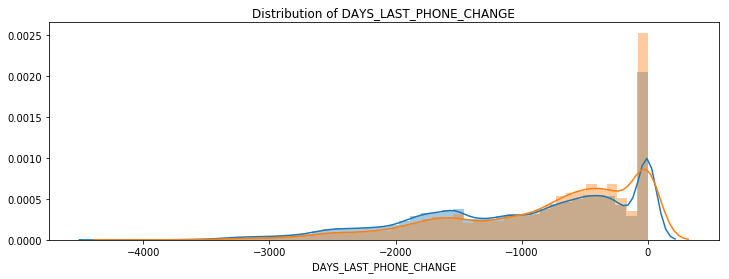

In [16]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_LAST_PHONE_CHANGE")
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_LAST_PHONE_CHANGE'].dropna(), label='target = 0')
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_LAST_PHONE_CHANGE'].dropna(), label='target = 1')

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


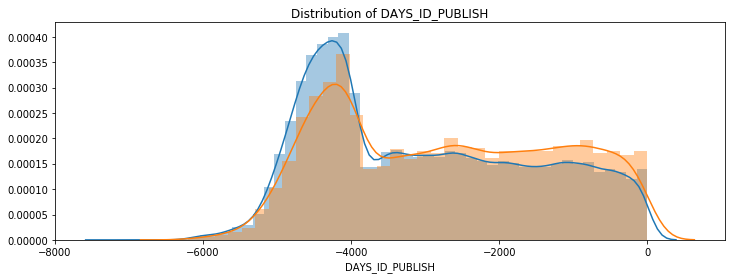

In [17]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_ID_PUBLISH")
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_ID_PUBLISH'], label='target = 0')
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_ID_PUBLISH'], label='target = 1')

I guess there is little bit of trend in both graphs.

### <a id='1.8' href='#index'>1.8 FLAG_DOCUMENTS_*n* </a>

There are total 20 FLAG_DOCUMENTS_*n* features (ranging from 2 to 21)

These are binary variable that answers "did client provide document *n*."

In [18]:
app_train.filter(like='FLAG_DOCUMENT', axis=1).mean()

FLAG_DOCUMENT_2     0.000042
FLAG_DOCUMENT_3     0.710023
FLAG_DOCUMENT_4     0.000081
FLAG_DOCUMENT_5     0.015115
FLAG_DOCUMENT_6     0.088055
FLAG_DOCUMENT_7     0.000192
FLAG_DOCUMENT_8     0.081376
FLAG_DOCUMENT_9     0.003896
FLAG_DOCUMENT_10    0.000023
FLAG_DOCUMENT_11    0.003912
FLAG_DOCUMENT_12    0.000007
FLAG_DOCUMENT_13    0.003525
FLAG_DOCUMENT_14    0.002936
FLAG_DOCUMENT_15    0.001210
FLAG_DOCUMENT_16    0.009928
FLAG_DOCUMENT_17    0.000267
FLAG_DOCUMENT_18    0.008130
FLAG_DOCUMENT_19    0.000595
FLAG_DOCUMENT_20    0.000507
FLAG_DOCUMENT_21    0.000335
dtype: float64

* Looks like a lot of zeros in this data. 
* FLAG_DOCUMENT_3 has highest turn-in rate, 71%, and it also had high postive correlation with the TARGET. 

### <a id='1.9' href='#index'>1.9 EXT_SOURCE_*n* </a>

This is very interesting features! There are in total three of these features and according to column descriptions: 
- EXT_SOURCE_1: Normalized score from external data source
- EXT_SOURCE_2: Normalized score from external data source
- EXT_SOURCE_3: Normalized score from external data source

And all three has noticably high negative correlation with the target.

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


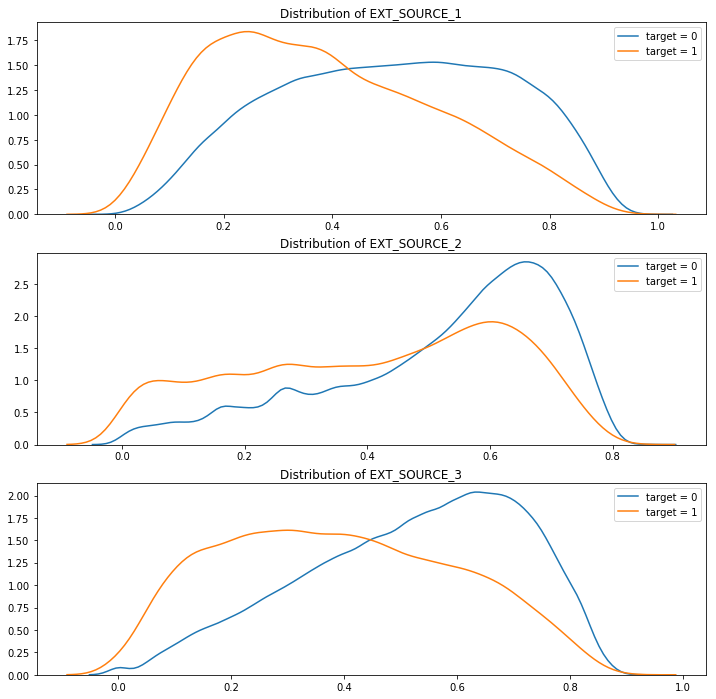

In [19]:
plt.figure(figsize = (12, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)

    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source].dropna(), label = 'target = 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source].dropna(), label = 'target = 1')
    
    plt.title('Distribution of %s' % source)

These features seems to have some relationship with target. They don't necessarily have *strong* relationships, but they seems like ones with the strongest indicators so far.

### <a id='1.10' href='#index'>1.10 DAYS_EMPLOYED</a>

Self explanatory, but:
* DAYS_EMPLOYED: How many days before the application the person started current employment

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


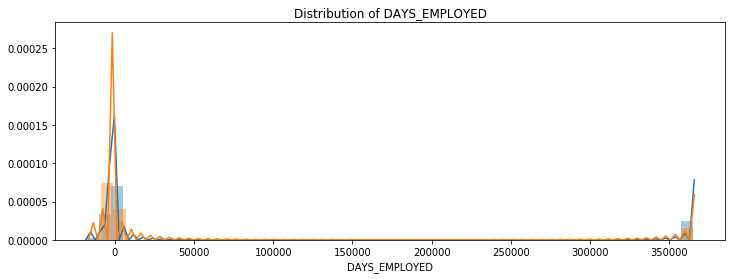

In [20]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_EMPLOYED")
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'].dropna(), label='target = 0')
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'].dropna(), label='target = 1')

This data seems like corrupted. (or other reasons perhaps?)

There are people who has been employed for over 1,000 years and it seems like there's quite a bit of them. 

Let's collect these people:

In [21]:
anomalies = app_train[app_train['DAYS_EMPLOYED'] >= 300000]
normal = app_train[app_train['DAYS_EMPLOYED'] < 30000]

# describe
anomalies['DAYS_EMPLOYED'].describe()

count     55374.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [22]:
# compare targets of both groups
print('The normal default on %0.2f%% of loans' % (100 * normal['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalies['TARGET'].mean()))

The normal default on 8.66% of loans
The anomalies default on 5.40% of loans


C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


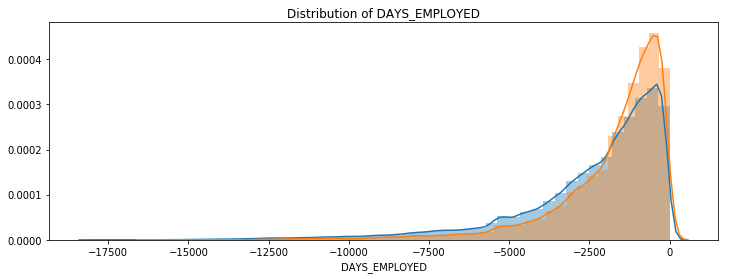

In [23]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_EMPLOYED")
sns.distplot(normal.loc[normal['TARGET'] == 0, 'DAYS_EMPLOYED'].dropna(), label='target = 0')
sns.distplot(normal.loc[normal['TARGET'] == 1, 'DAYS_EMPLOYED'].dropna(), label='target = 1')

Few things: 
* Now the graph makes sense: people with shorter days of employment are more like to default on loans. 
* There are 55,374 observations that has exactly 365,243 DAYS_OF_EMPLOYMENT.
* AND they seem to default less than the sample average.
* It could be worthwhile to make an identifier for this group and replace 365,243 with missing value. 

### <a id='1.11' href='#index'>1.11 Normalized Information About Where Client Lives</a>

There are 47 features about 'Normalized Information About Where Client Lives.' They column descriptions are as followed: 
- Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

In [24]:
apartment_feature = app_train[app_train.columns[44:91]]
apartment_feature.head(5)

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


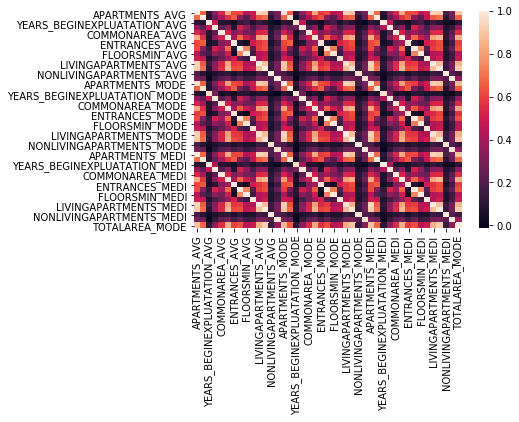

In [25]:
# corr.iloc[32:75, 32:75] 
sns.heatmap(corr.iloc[32:75, 32:75])

In [26]:
# how many missing values?
missing_percentage = apartment_feature.isnull().sum().sum() / (apartment_feature.shape[0] * apartment_feature.shape[1])

print("Missing values in apartment feature ", format(missing_percentage * 100, '.2f'), '%')

Missing values in apartment feature  57.87 %


* Maybe look for ways to feature engineer these variables by using some domain knowledge?

## <a id = 'section2' href = '#index'>Section 2: previous_application.csv</a>
___
* Application data of client's previous loan in Home Credit
* Info about the previous loan parameters and client info at the time of previous application
* One row per previous application

In [27]:
# load the data
previous = pd.read_csv('../input/Home Credit Default Risk/previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True)

In [28]:
print('Size of previous application data', previous.shape)
previous.head()

Size of previous application data (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0


### <a id='2.1' href='#index'>2.1 Data Types of Columns</a>

In [29]:
# number of each type of columns
previous.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [30]:
# number of unique classes for each object type columns
previous.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

I will convert those into dummy variable later, when I'm data cleaning and feature engineering. 

### <a id='2.2' href='#index'>2.2 Missing Values</a>


In [31]:
from utils import missing_values_table

missing_values_table_prev = missing_values_table(previous)
missing_values_table_prev.head(20)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


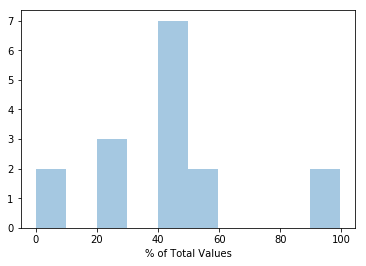

In [32]:
sns.distplot(missing_values_table_prev['% of Total Values'], kde = False, bins = 10)

* RATE_INTEREST_PRIMARY: Interest rate normalized on previous credit
* RATE_INTEREST_PRIVILEGED: Interest rate normalized on previous credit

RATE_INTEREST_PRIMARY and RATE_INTEREST_PREIVILEGED has too many missing values (99.6%).

### <a id='2.3' href='#index'>2.3 RATE_INTEREST_PRIMARY and RATE_INTEREST_PREIVILEGED</a>

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


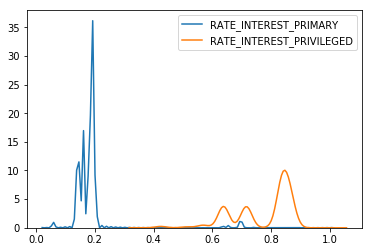

In [33]:
sns.kdeplot(previous['RATE_INTEREST_PRIMARY'].dropna())
sns.kdeplot(previous['RATE_INTEREST_PRIVILEGED'].dropna())

Hmmmm

### <a id='2.4' href='#index'>2.4 DAYS_FIRST_DRAWING</a>

So interesting thing I found while looking at the head! The **mysterious number 365,243 reappears.**

* DAYS_FIRST_DRAWING: Relative to application date of current application when was the first disbursement of the previous application,time only relative to the application

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


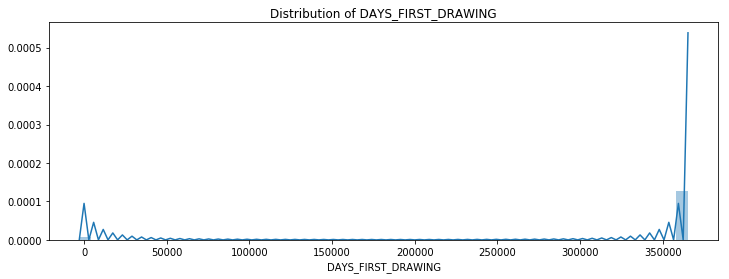

In [34]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_FIRST_DRAWING")
sns.distplot(previous['DAYS_FIRST_DRAWING'].dropna())

In [35]:
# fun stuff. Let's looks at those anomalies again. 
prev_anomalies = previous[previous['DAYS_FIRST_DRAWING'] >= 300000]
prev_normal = previous[previous['DAYS_FIRST_DRAWING'] < 30000]

# compare counts
print('The number of normal observations is', prev_normal['DAYS_FIRST_DRAWING'].shape[0])
print('The number of anomalies is', prev_anomalies['DAYS_FIRST_DRAWING'].shape[0])

The number of normal observations is 62705
The number of anomalies is 934444


Out of 1,670,214 observations we have, 934,444 observations are anomalies. 

There has to be some reason for this!

* The number 365,243 was first surfaced in DAYS_EMPLOYED feature in [app_train dataset](#1.10). 

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


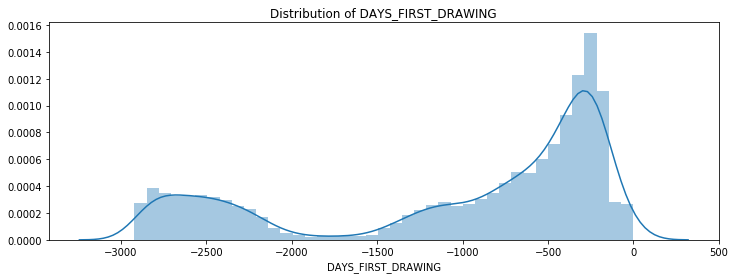

In [36]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_FIRST_DRAWING")
sns.distplot(prev_normal['DAYS_FIRST_DRAWING'].dropna())

This is interesting looking distribution like there are two clusters. I guess people don't really make disbursement during the 4th yea and 5th of the loan. Maybe there was an issue with Home Credit during that time. 

### <a id='2.5' href='#index'>2.5 DAYS_TERMINATION</a>

* DAYS_TERMINATION: Relative to application date of current application when was the expected termination of the previous application,time only relative to the application

This would show some relationship between previous application and current application. 

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


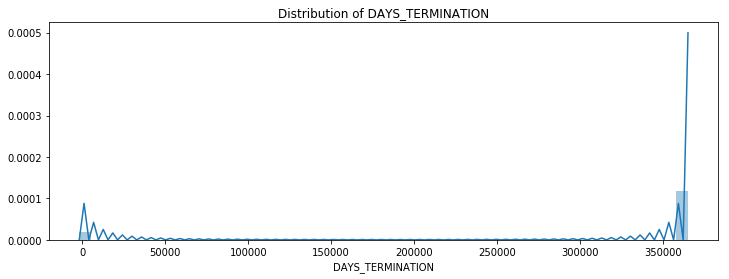

In [37]:
plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_TERMINATION")
sns.distplot(prev_normal['DAYS_TERMINATION'].dropna())

The number of normal observations is 771236
The number of anomalies is 225913


C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


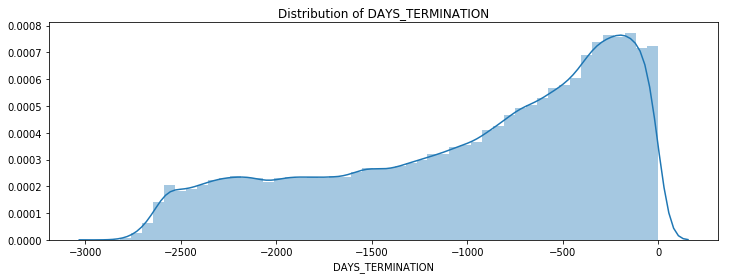

In [38]:
# AGAIN, the magical number resurfaces 
prev_anomalies = previous[previous['DAYS_TERMINATION'] >= 300000]
prev_normal = previous[previous['DAYS_TERMINATION'] < 30000]

# compare counts
print('The number of normal observations is', prev_normal['DAYS_TERMINATION'].shape[0])
print('The number of anomalies is', prev_anomalies['DAYS_TERMINATION'].shape[0])

plt.figure(figsize=(12,4))
plt.title("Distribution of DAYS_TERMINATION")
sns.distplot(prev_normal['DAYS_TERMINATION'].dropna())

* Looks like we have to make it our business to go through the data and look for value 354,243 and turn it into something else. OR create an identifier. 
* The graph is quite surprising! It suggests a lot of people apply for the new application soon after they terminate the previous one.

### <a id='2.6' href='#index'>2.6 Number 354243</a>

It seems 354243 appears often, so let's try to make sense of this. 

In [39]:
# create dataframe for values with 354243
prev_354243 = pd.DataFrame(previous[previous[:] == 365243.0].count())
app_354243 = pd.DataFrame(app_train[app_train[:] == 365243.0].count())

In [40]:
# drop unnecessary variables
app_354243 = app_354243[app_354243[0] != 0]
prev_354243 = prev_354243[prev_354243[0] != 0]

In [41]:
print('Columns with 3543243 in application csv: \n', app_354243.index)
print('Columns with 3543243 in previous application csv: \n', prev_354243.index)

Columns with 3543243 in application csv: 
 Index(['SK_ID_CURR', 'DAYS_EMPLOYED'], dtype='object')
Columns with 3543243 in previous application csv: 
 Index(['SK_ID_CURR', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')


After looking at discussion in Kaggle, there was an answer from competition host clarifying *"Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values".*

So when replacing this number, we would have to think about what it would imply.
- for example, 0 could work for DAYS_EMPLOYED, because it would imply that the applicant isn't working.
- but for DAYS_FIRST_DRAWING, 0 would imply applicant made the disbursement very fast. 

## <a id = 'section3' href = '#index'>Section 3: bureau.csv</a>
___
* Application data from previous loans that client got from other institutions and that were reported to Credit Bureau
* One row per client's loan in Credit Bureau

In [42]:
# load the data
bureau = pd.read_csv('../input/Home Credit Default Risk/bureau.csv').sort_values(['SK_ID_CURR', 'SK_ID_BUREAU']).reset_index(drop = True)

In [43]:
print('Size of previous application data', bureau.shape)
bureau.head()

Size of previous application data (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
1,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
2,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
3,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
4,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5


### <a id='3.1' href='#index'>3.1 Data Types of Columns</a>

In [44]:
# number of each type of columns
previous.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [45]:
# number of unique classes for each object type columns
previous.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

### <a id='3.2' href='#index'>3.2 Missing Values</a>

In [46]:
missing_values_table_bureau = missing_values_table(bureau)
missing_values_table_bureau.head(20)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


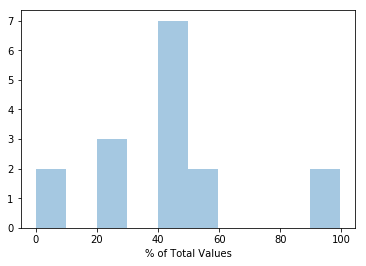

In [47]:
sns.distplot(missing_values_table_prev['% of Total Values'], kde = False, bins = 10)

### <a id='3.3' href='#index'>3.3 Number of Previous Applications per User</a>

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


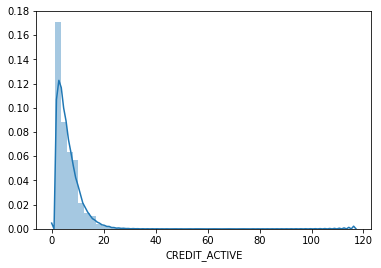

In [48]:
bureau_group = bureau.groupby('SK_ID_CURR')

sns.distplot(bureau_group.count()['CREDIT_ACTIVE'])

In [49]:
bureau_group.count()['CREDIT_ACTIVE'].describe()

count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: CREDIT_ACTIVE, dtype: float64

Look at anomalies with 116 loans. 

In [50]:
bureau_group.count()['CREDIT_ACTIVE'][bureau_group.count()['CREDIT_ACTIVE'] > 50]

SK_ID_CURR
120860    116
129843     58
169704     94
177014     56
218175     55
220625     51
241096     52
246770     54
251643     61
252366     55
260762     53
280042     51
280155     55
281455     54
295809     59
318065     78
325354     55
385133     57
425396     60
430261     54
Name: CREDIT_ACTIVE, dtype: int64

* Normally on average, people take 5 to 6 loans with standard deviation of 4.4ish. However, there are those who take out excessive amount of loans. These could become an identifier.

### <a id='3.4' href='#index'>3.4 CREDIT ACTIVE</a>

* CREDIT_ACTIVE: Status of the Credit Bureau (CB) reported credits

In [51]:
print('Credit Active has ', bureau['CREDIT_ACTIVE'].nunique(), ' unique classes')
print('Those classes are ', bureau['CREDIT_ACTIVE'].unique())

Credit Active has  4  unique classes
Those classes are  ['Closed' 'Active' 'Sold' 'Bad debt']


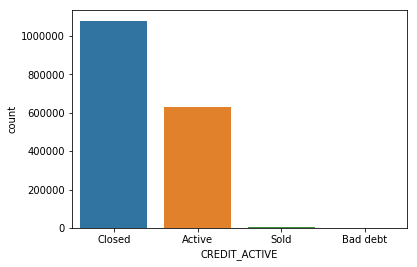

In [52]:
sns.countplot(bureau['CREDIT_ACTIVE'])

In [53]:
# number of Credit Active classes 
bureau.groupby('CREDIT_ACTIVE').sum()['SK_ID_CURR']

CREDIT_ACTIVE
Active      175468821592
Bad debt         6178597
Closed      300272018953
Sold          1788882984
Name: SK_ID_CURR, dtype: int64

* There aren't many Bad Debts in comparison to other classes, but it could be a meaningful feature.

### <a id='3.5' href='#index'>3.5 AMT_CREDIT_SUM</a>

* AMT_CREDIT_SUM: Current credit amount for the Credit Bureau credit
* AMT_CREDIT_SUM_DEBT: Current debt on Credit Bureau credit
* AMT_CREDIT_SUM_LIMIT: Current credit limit of credit card reported in Credit Bureau
* AMT_CREDIT_SUM_OVERDUE: Current amount overdue on Credit Bureau credit

C:\Users\Gabe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x288 with 0 Axes>

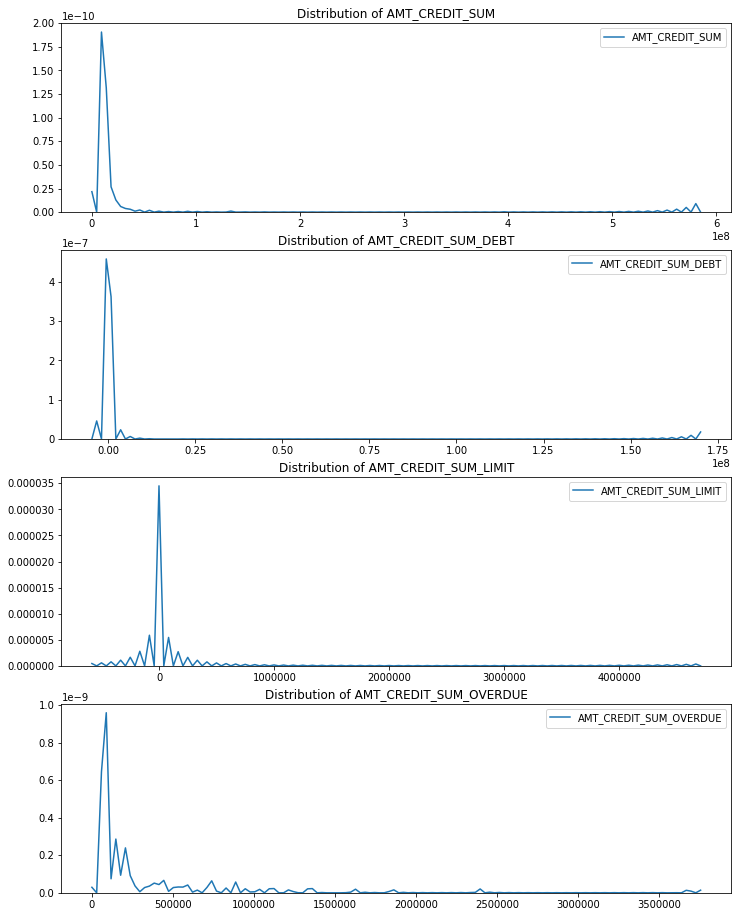

<Figure size 864x288 with 0 Axes>

In [54]:
plt.figure(figsize = (12, 16))

# iterate through the sources
for i, source in enumerate(['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']):
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(bureau[source].dropna())
    plt.title('Distribution of %s' % source)
plt.figure(figsize=(12,4))

## <a id='section4' href='#index'>Section 4: Limitation</a>

The main limitation I face is computational cost. This will limit the following:
- I won't include other three behavior datasets. Too much data.
- I won't be using automated feature engineering library. (I will make attempts at manual feature engineering tho)


## <a id='section5' href='#index'>Section 5: Feature Importance using Random Forest Model</a>

Let's see what features seems important!

This could also be considered baseline model. 

In [55]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [56]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [57]:
# Align Training and Test Data
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [58]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=20, max_features=0.2, random_state=929)

rf.fit(train, train_labels)

NameError: name 'random_forest' is not defined

In [67]:
# get feature importances
feature_importance_values = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.set_index('feature', inplace=True)

# Make predictions on the test data
predictions = rf.predict_proba(test)[:, 1]

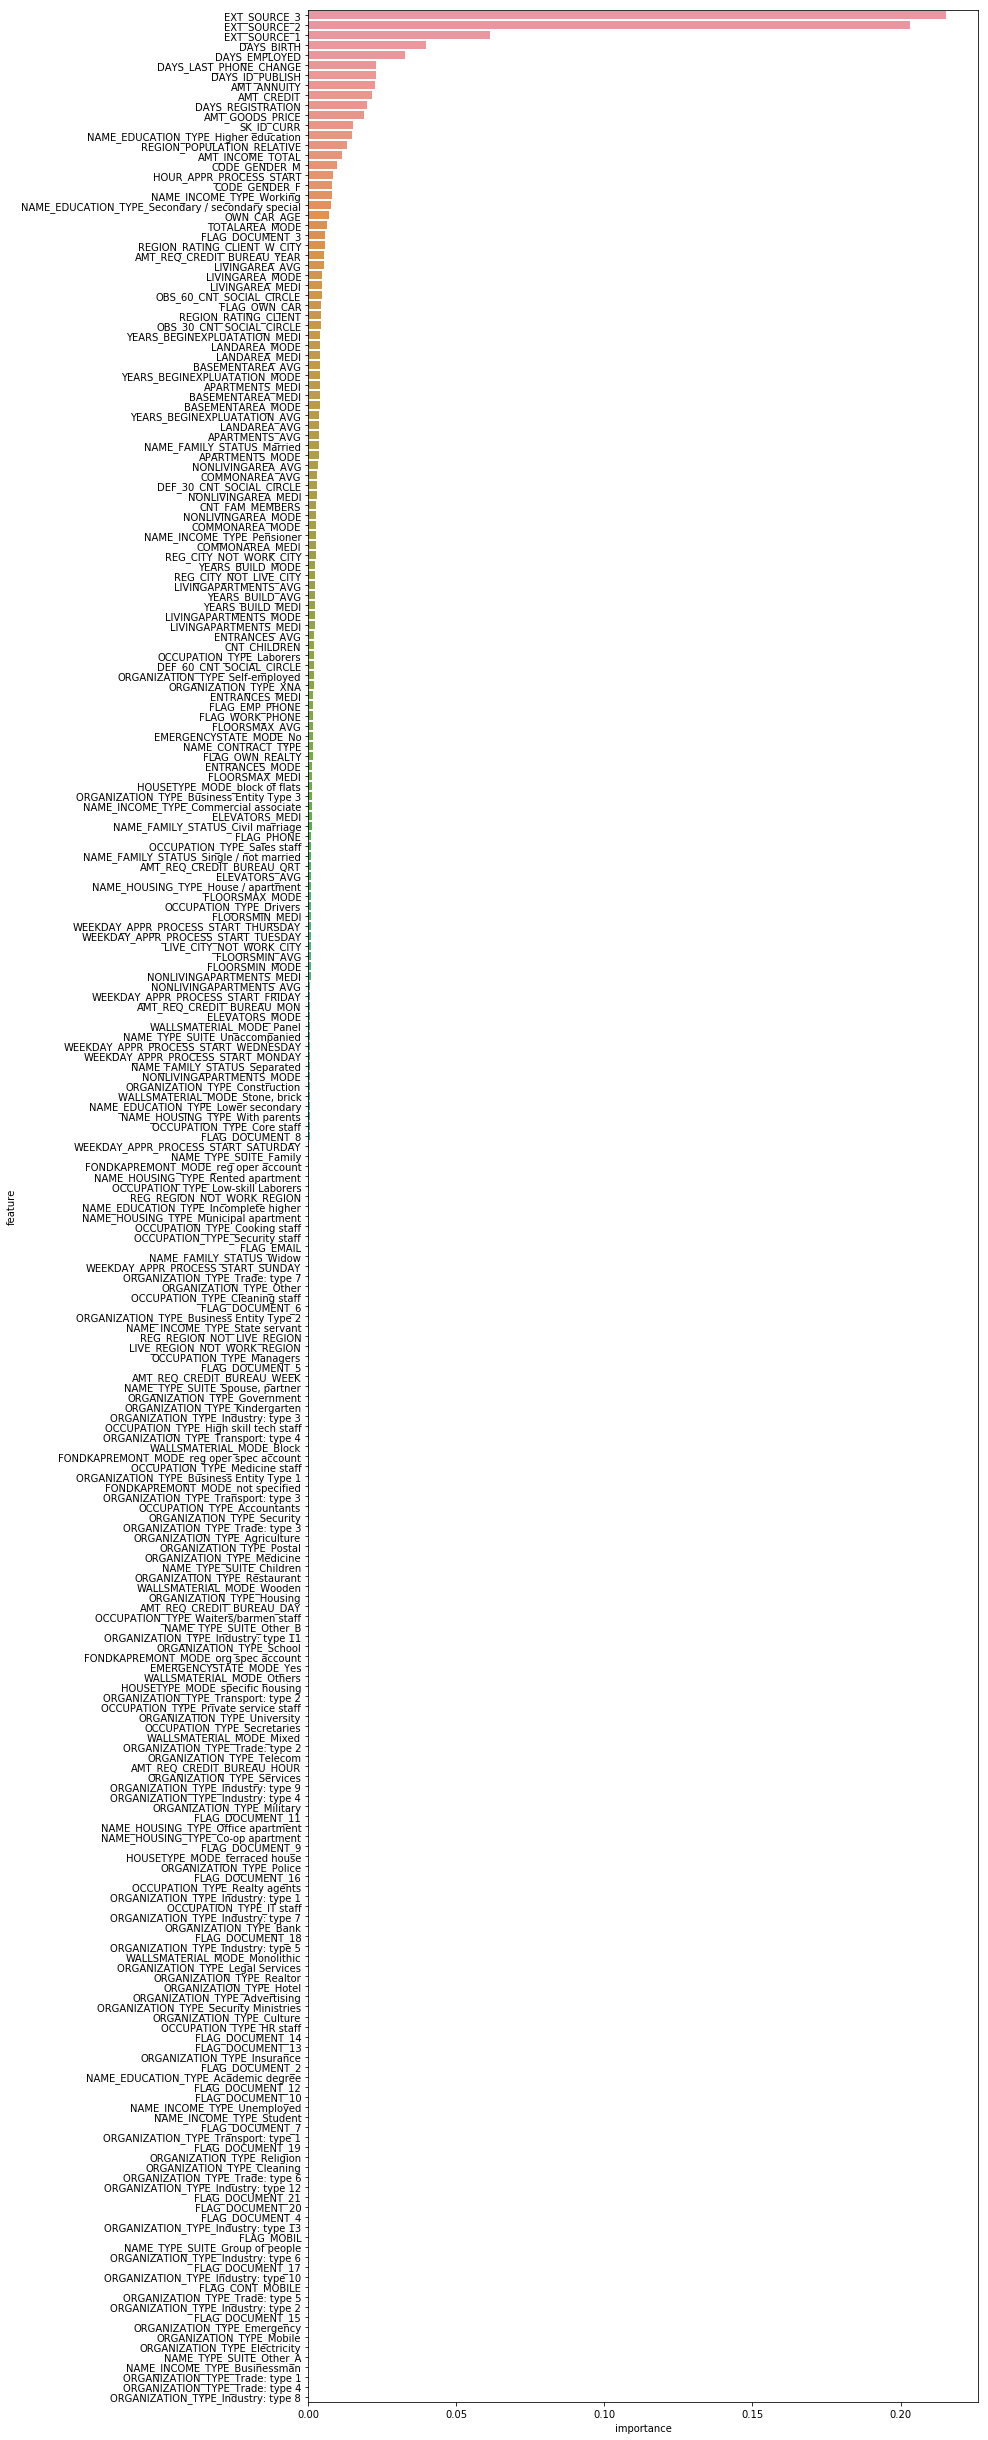

In [70]:
feature_importances.sort_values(by='importance', axis = 0, ascending=False, inplace=True)

plt.figure(figsize = (12, 44))
plt.tight_layout()

sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)

In [71]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

C:\Users\Gabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
